In [1]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import manifold, decomposition, linear_model, ensemble, neighbors, cross_validation
import sklearn
from sklearn import pipeline, preprocessing, feature_extraction
from sklearn.metrics import f1_score
#import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, auc, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from scipy import sparse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#import lightgbm as lgbm
import scipy
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/afattahov/tf3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
df_train = pd.read_csv('../train_task_b.csv')

In [22]:
df_train.ix[3, 2]

'При нагревании кусочки янтаря становятся очень пластичными. Это свойство используют при горячем прессовании, когда измельченный в порошок натуральный янтарь рассыпают в пресс-формы. Под воздействием температуры и давления порошок превращается в вязкую массу. После охлаждения и затвердевания в фигурных формах получаются изделия из прессованного камня. Камень, полученный таким способом, получил название амброид (от англ. amber — янтарь). Янтарный порошок может быть смешан с различными красителями, что даёт возможность получать яркие контрастные цвета (белый, чёрный, красный) и оттенки близкие к натуральным (полупрозрачный зеленоватый, вишневый). При прессовании вместе с янтарным порошком могут использоваться отшлифованные кусочки янтаря различных фракций для придания эффекта мозаичности. Изделия из прессованного янтаря не уступают по красоте изделиям из монолитных камней, однако будут стоить в разы дешевле.'

In [21]:
df_train.ix[3, 4]

'изделиям из монолитных камней'

In [21]:
len(df_train['paragraph_id'].unique())

9080

In [3]:
df_train['paragraph_len'] = df_train['paragraph'].apply(lambda x: len(x.split(' ')))
df_train['question_len'] = df_train['question'].apply(lambda x: len(x.split(' ')))
df_train['answer_len'] = df_train['answer'].apply(lambda x: len(x.split(' ')))

In [4]:
df_train['paragraph_len_ch'] = df_train['paragraph'].apply(lambda x: len(x))
df_train['question_len_ch'] = df_train['question'].apply(lambda x: len(x))
df_train['answer_len_ch'] = df_train['answer'].apply(lambda x: len(x))

In [8]:
df_train['answer_len_ch'].mean() / df_train['paragraph_len'].mean()

0.25951989892608968

In [48]:
tmp = pd.DataFrame(df_train.groupby('paragraph_id')['question_id'].count())
tmp.reset_index(inplace=True)
tmp.columns = ['paragraph_id', 'paragraph_freq']
df_train = pd.merge(df_train, tmp, on=['paragraph_id'], how='left')

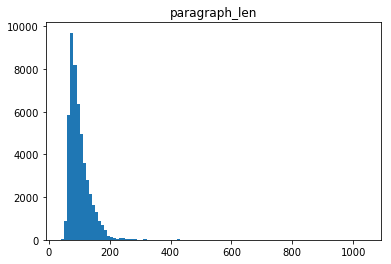

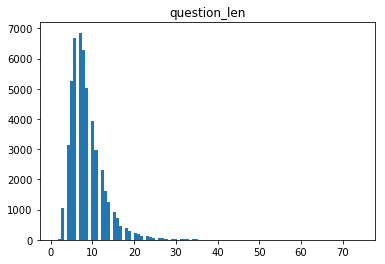

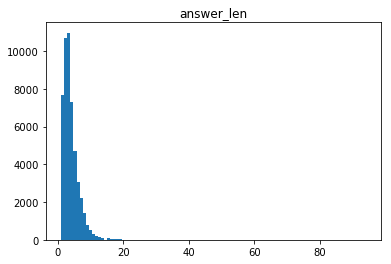

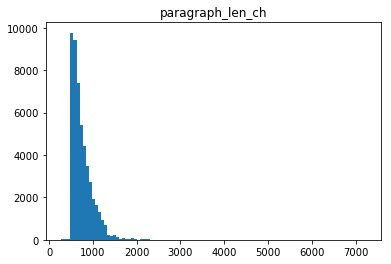

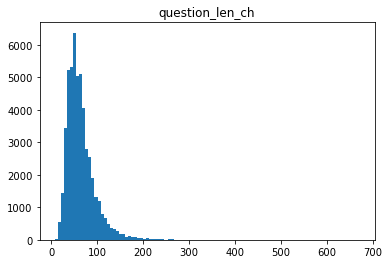

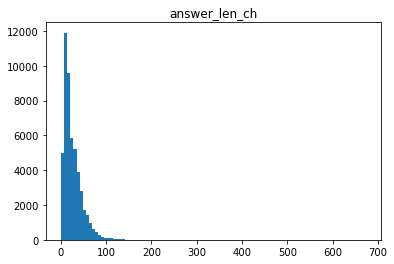

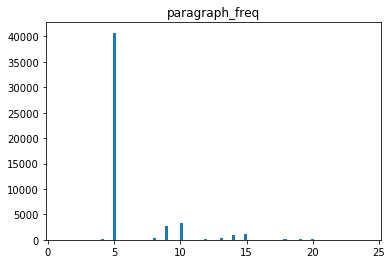

In [49]:
len_list = ['paragraph_len', 'question_len', 'answer_len',
            'paragraph_len_ch', 'question_len_ch', 'answer_len_ch', 'paragraph_freq']
for i in len_list:    
    plt.title(i) 
    #pylab.figure(figsize=(8, 6))
    plt.hist(df_train[i], bins=100)
    plt.show()

In [50]:
df_train

,paragraph_id,question_id,paragraph,question,answer,paragraph_len,question_len,answer_len,paragraph_len_ch,question_len_ch,answer_len_ch,paragraph_freq
0,14754,60544,Первые упоминания о строении человеческого тел...,Где встречаются первые упоминания о строении ч...,в Древнем Египте,82,8,3,552,64,16,5
1,13859,1604,Телескоп имеет модульную структуру и содержит ...,Как называется корректирующая оптическая систе...,COSTAR,68,22,1,566,185,6,5
2,8310,30350,Критики теории Вегенера поставили во главу угл...,Какая теория была отвергнута после смерти Веге...,теория дрейфа материков,125,7,3,982,51,23,5
3,8766,53270,При нагревании кусочки янтаря становятся очень...,Чему не уступают по красоте изделия из прессов...,изделиям из монолитных камней,117,9,4,918,60,29,5
4,14719,75698,Нисходящие дифтонги со слабым гласным /i/ и /u...,На какие группы классифицируют дифтонги?,оральные и назальные,107,5,3,756,40,20,5
5,4857,71431,По мнению Швейцарского банковского объединения...,На что в дальнейшем смогут рассчитывать зарубе...,на предсказуемость швейцарского правового порядка,71,9,5,579,65,49,5
6,6674,58761,"Судебная власть организована в форме пирамиды,...",Что имеет каждый судебный округ?,суд первой инстанции,222,5,3,1588,32,20,5
7,6980,18725,Сверхкороткие импульсы лазерного излучения исп...,"Что используются и в военных целях, например, ...",Лазеры,76,13,1,654,90,6,5
8,1154,28808,Разработчики и контролёры‐испытатели проприета...,"Что в гораздо большей степени зависит от того,...",эффективность разработки,90,21,2,702,155,24,5
9,13109,42131,"Лингвистика языка изучает язык как код, то ест...",Что в лингвистике речи понимается под речевыми...,Статический аспект речи — предмет лингвистики ...,96,8,7,769,62,52,5


In [54]:
df_train['paragraph_len'].mean()

100.57977920737035

In [55]:
50364 * 100

5036400

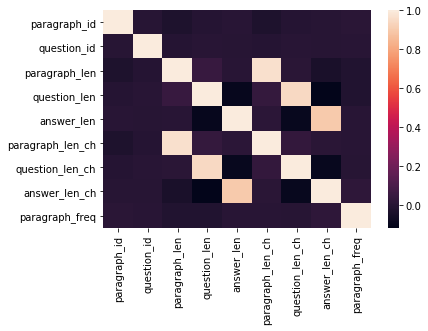

In [53]:
import seaborn as sns
CorrKoef = df_train.corr()
#pylab.figure(figsize=(50, 25))
sns.heatmap(CorrKoef, annot=False)